<a href="https://colab.research.google.com/github/Neha1626/Final_Project_ML_LeanIN/blob/main/Final_Project_LeanIn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/HR Employee Attrition.csv')
df.shape

(1470, 35)

In [ ]:
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,4,Male,39,2,3,Sales Executive,1,Divorced,10854,16586,4,Y,Yes,13,3,2,80,1,20,3,3,3,2,2,0
1390,28,Yes,Travel_Rarely,1404,Research & Development,17,3,Technical Degree,1,1960,3,Male,32,2,1,Laboratory Technician,4,Divorced,2367,18779,5,Y,No,12,3,1,80,1,6,2,2,4,1,0,3
1417,31,No,Travel_Rarely,1154,Sales,2,2,Life Sciences,1,1996,1,Male,54,3,1,Sales Representative,3,Married,3067,6393,0,Y,No,19,3,3,80,1,3,1,3,2,2,1,2
1119,38,No,Travel_Rarely,1245,Sales,14,3,Life Sciences,1,1582,3,Male,80,3,2,Sales Executive,2,Married,9924,12355,0,Y,No,11,3,4,80,1,10,3,3,9,8,7,7
1312,31,Yes,Travel_Rarely,359,Human Resources,18,5,Human Resources,1,1842,4,Male,89,4,1,Human Resources,1,Married,2956,21495,0,Y,No,17,3,3,80,0,2,4,3,1,0,0,0
1135,46,No,Travel_Rarely,563,Sales,1,4,Life Sciences,1,1602,4,Male,56,4,4,Manager,1,Single,17567,3156,1,Y,No,15,3,2,80,0,27,5,1,26,0,0,12
118,36,No,Travel_Rarely,922,Research & Development,3,2,Life Sciences,1,155,1,Female,39,3,1,Laboratory Technician,4,Divorced,2835,2561,5,Y,No,22,4,1,80,1,7,2,3,1,0,0,0
1064,30,No,Travel_Rarely,330,Human Resources,1,3,Life Sciences,1,1499,3,Male,46,3,1,Human Resources,3,Divorced,2064,15428,0,Y,No,21,4,1,80,1,6,3,4,5,3,1,3
1408,23,No,Travel_Rarely,571,Research & Development,12,2,Other,1,1982,4,Male,78,3,1,Laboratory Technician,4,Single,2647,13672,1,Y,No,13,3,3,80,0,5,6,4,5,2,1,4
404,28,No,Travel_Rarely,1300,Research & Development,17,2,Medical,1,536,3,Male,79,3,2,Laboratory Technician,1,Divorced,4558,13535,1,Y,No,12,3,4,80,1,10,2,3,10,0,1,8


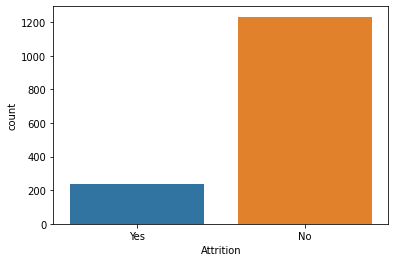

In [ ]:
sns.countplot('Attrition', data=df);

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
df.isnull().any().any()

False

In [ ]:
df = df.drop('EmployeeCount', axis=1) # removing EmployeeCount from numerical columns
df = df.drop('StandardHours', axis=1)

In [ ]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype=='object']
df[categorical_cols].sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
816,No,Non-Travel,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,No
1042,No,Non-Travel,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,No
1136,Yes,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,Yes
92,No,Travel_Rarely,Sales,Medical,Female,Sales Executive,Divorced,Y,Yes
22,No,Travel_Rarely,Research & Development,Life Sciences,Female,Research Director,Single,Y,No


In [ ]:
cols = ['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

df = pd.get_dummies(df, columns=cols, drop_first=True)

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cols = ['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

scaler = StandardScaler()
for col in cols:
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1 ,1))
    X_test[col] = scaler.fit_transform(X_test[col].values.reshape(-1 ,1))

The optimal number of neighbors is  7 


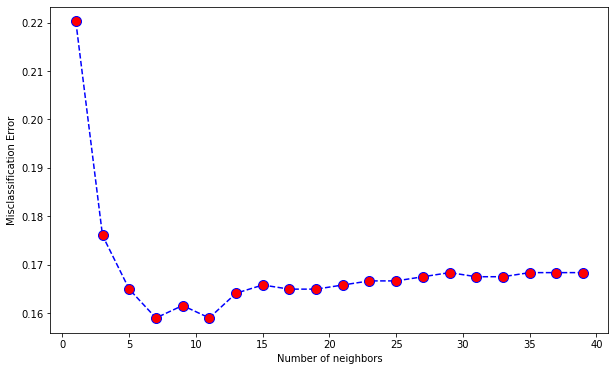

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
neighbors = []  
cv_scores = []  
    
from sklearn.model_selection import cross_val_score  
# perform 10 fold cross validation  
for k in range(1, 40, 2):  
    neighbors.append(k)  
    knn = KNeighborsClassifier(n_neighbors = k)  
    scores = cross_val_score(  
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')  
    cv_scores.append(scores.mean()) 
error_rate = [1-x for x in cv_scores]  
    
# determining the best k  
optimal_k = neighbors[error_rate.index(min(error_rate))]  
print('The optimal number of neighbors is % d ' % optimal_k)  
    
# plot misclassification error versus k  
plt.figure(figsize = (10, 6))  
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
plt.xlabel('Number of neighbors')  
plt.ylabel('Misclassification Error')  
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix 
  
def print_score(clf, X_train, y_train, X_test, y_test, train = True): 
    if train: 
        print("Train Result:") 
        print("------------") 
        print("Classification Report: \n {}\n".format(classification_report( 
                y_train, clf.predict(X_train)))) 
        print("Confusion Matrix: \n {}\n".format(confusion_matrix( 
                y_train, clf.predict(X_train)))) 
  
        res = cross_val_score(clf, X_train, y_train,  
                              cv = 10, scoring ='accuracy') 
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res))) 
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res))) 
        print("accuracy score: {0:.4f}\n".format(accuracy_score( 
                y_train, clf.predict(X_train)))) 
        print("----------------------------------------------------------") 
                 
    elif train == False: 
        print("Test Result:") 
        print("-----------") 
        print("Classification Report: \n {}\n".format( 
                classification_report(y_test, clf.predict(X_test)))) 
        print("Confusion Matrix: \n {}\n".format( 
                confusion_matrix(y_test, clf.predict(X_test))))  
        print("accuracy score: {0:.4f}\n".format( 
                accuracy_score(y_test, clf.predict(X_test)))) 
        print("-----------------------------------------------------------") 
          
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(X_train, y_train) 
print_score(knn, X_train, y_train, X_test, y_test, train = True) 
print_score(knn, X_train, y_train, X_test, y_test, train = False) 

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

          No       0.86      1.00      0.92       978
         Yes       0.90      0.18      0.30       198

    accuracy                           0.86      1176
   macro avg       0.88      0.59      0.61      1176
weighted avg       0.86      0.86      0.82      1176


Confusion Matrix: 
 [[974   4]
 [163  35]]

Average Accuracy: 	 0.8410
Accuracy SD: 		 0.0130
accuracy score: 0.8580

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.88      0.98      0.93       255
         Yes       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294


Confusion Matrix: 
 [[251   4]
 [ 35   4]]

accuracy score: 0.867

In [ ]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [ ]:
rfc = RandomForestClassifier(**rf_params) 
rfc.fit(X_train, y_train) 
print_score(rfc, X_train, y_train, X_test, y_test, train = True) 
print_score(rfc, X_train, y_train, X_test, y_test, train = False) 

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

          No       0.85      1.00      0.92       978
         Yes       1.00      0.14      0.24       198

    accuracy                           0.85      1176
   macro avg       0.93      0.57      0.58      1176
weighted avg       0.88      0.85      0.81      1176


Confusion Matrix: 
 [[978   0]
 [171  27]]

Average Accuracy: 	 0.8410
Accuracy SD: 		 0.0124
accuracy score: 0.8546

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.88      1.00      0.94       255
         Yes       1.00      0.10      0.19        39

    accuracy                           0.88       294
   macro avg       0.94      0.55      0.56       294
weighted avg       0.90      0.88      0.84       294


Confusion Matrix: 
 [[255   0]
 [ 35   4]]

accuracy score: 0.881

In [ ]:
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}


Text(0, 0.5, 'Features')

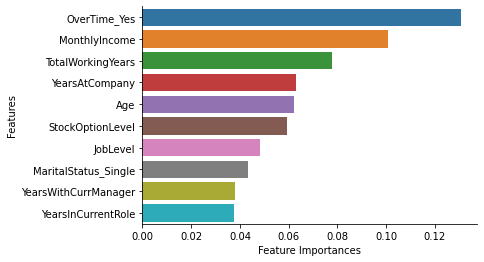

In [ ]:
feature = rfc.feature_importances_
feature_importances = pd.Series(feature, index=X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")